# Code for plots in the directional filter paper

#### Importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("MacOSX")
from matplotlib import cm
from cycler import cycler
from sympy import symbols, I, cos, sin, re, im, Abs, lambdify, simplify, expand
from sympy import *
import numpy.polynomial.polynomial as poly

# random
rng = np.random.default_rng()

from filterbank.components import Filterbank, TransmissionLine, ManifoldFilter, DirectionalFilter, BaseFilter

plt.style.use('~/Repos/louis-style-docs/default.mplstyle')

fig_path = "./figures/"


#### Settings

In [2]:
nF = int(2e4)
f = np.linspace(210e9,450e9,nF)

f0_single = 330e9

f0_min = 220e9
f0_max = 440e9

## Variances
sigma_Qc = 0.04 #0.10
sigma_f0 = 0. #0.085


Z0_res = 50.6
eps_eff_res = 28.8
Qi_res = 1200


Z0_thru = 80.4
eps_eff_thru = 29.7

TL_thru = TransmissionLine(Z0_thru,eps_eff_thru)

TL_res = TransmissionLine(Z0_res,eps_eff_res,Qi=np.inf)
TL_res_lossy = TransmissionLine(Z0_res,eps_eff_res,Qi=Qi_res)

TransmissionLinesDict = {
    'through' : TL_thru,
    'resonator' : TL_res,
    'MKID' : TL_thru
}

TransmissionLinesLossyDict = {
    'through' : TL_thru,
    'resonator' : TL_res_lossy,
    'MKID' : TL_thru
}



2024-05-10 10:15:10.263 python[9293:130595] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647


#### Generate numerical models

In [3]:
#-----------------------------
single_filter_MF = ManifoldFilter(
    f0=f0_single,
    Ql=500,
    TransmissionLines=TransmissionLinesDict,
    compensate=False
)
single_filter_MF.S(f)
single_filter_MF.realized_parameters()

single_filter_DF = DirectionalFilter(
    f0=f0_single,
    Ql=500,
    TransmissionLines=TransmissionLinesDict,
    compensate=False
)
single_filter_DF.S(f)
single_filter_DF.realized_parameters()
#-----------------------------



#-----------------------------
## Manifold filter, no variance
FB_MF_no_variance = Filterbank(
    FilterClass=ManifoldFilter,
    TransmissionLines=TransmissionLinesDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=0,
    sigma_Qc=0,
    compensate=False
)
FB_MF_no_variance.S(f)
FB_MF_no_variance.realized_parameters()

## Manifold filter, variance
FB_MF_variance = Filterbank(
    FilterClass=ManifoldFilter,
    TransmissionLines=TransmissionLinesLossyDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=sigma_f0,
    sigma_Qc=sigma_Qc,
    compensate=False
)
FB_MF_variance.S(f)
FB_MF_variance.realized_parameters()
#-----------------------------



#-----------------------------
## Directional filter, no variance
FB_DF_no_variance = Filterbank(
    FilterClass=DirectionalFilter,
    TransmissionLines=TransmissionLinesDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=0,
    sigma_Qc=0,
    compensate=False
)
FB_DF_no_variance.S(f)
FB_DF_no_variance.realized_parameters()

## Directional filter, variance
FB_DF_variance = Filterbank(
    FilterClass=DirectionalFilter,
    TransmissionLines=TransmissionLinesLossyDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=sigma_f0,
    sigma_Qc=sigma_Qc,
    compensate=False
)
FB_DF_variance.S(f)
FB_DF_variance.realized_parameters()
#-----------------------------

2024-05-10 10:15:10.284 python[9293:130595] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647


(array([4.39295373e+11, 4.38299371e+11, 4.37387368e+11, 4.36427366e+11,
        4.35623364e+11, 4.34783362e+11, 4.33895360e+11, 4.32995357e+11,
        4.32071355e+11, 4.31171353e+11, 4.30474751e+11, 4.29562749e+11,
        4.28662747e+11, 4.27882745e+11, 4.27042743e+11, 4.26034740e+11,
        4.25302738e+11, 4.24498736e+11, 4.23538734e+11, 4.22794732e+11,
        4.22062730e+11, 4.21042728e+11, 4.20214126e+11, 4.19530724e+11,
        4.18678122e+11, 4.17814120e+11, 4.16734117e+11, 4.15978115e+11,
        4.15210113e+11, 4.14322111e+11, 4.13506109e+11, 4.12702107e+11,
        4.11958105e+11, 4.10998102e+11, 4.10266101e+11, 4.09402099e+11,
        4.08741497e+11, 4.07865495e+11, 4.07122093e+11, 4.06329491e+11,
        4.05261488e+11, 4.04745487e+11, 4.03869485e+11, 4.03065483e+11,
        4.02081480e+11, 4.01265478e+11, 4.00521476e+11, 3.99813475e+11,
        3.98841472e+11, 3.98277471e+11, 3.97437469e+11, 3.96656867e+11,
        3.95865465e+11, 3.94940862e+11, 3.94184860e+11, 3.933934

#### Analytical model

In [4]:
c = 3e8

f0 = single_filter_DF.f0
eps_eff = single_filter_DF.Resonator1.TransmissionLine.eps_eff
l_res = single_filter_DF.Resonator1.l_res
cap = single_filter_DF.Resonator1.Coupler1.C
Z0 = single_filter_DF.Resonator1.TransmissionLine.Z0
ZR = single_filter_DF.Resonator1.Z_termination[0]

lambda0 = c / f0 / np.sqrt(eps_eff)


### Analytical model part
omega, C, Y0, YR, bet, l, freq, dummy = symbols('omega C Y0 YR beta l freq dummy')



denominator = (2 - 4*I * Y0/(omega * C)) * cos(bet*l) + (2* YR / (omega * C) + 1*I * (YR / Y0 + 2 * Y0 / YR - 2 * Y0 * YR / ((omega * C)**2))) * sin(bet*l)

# f0 = 270e9
# k0 = 2 * np.pi * f0 / c
# lambda0 = c / f0

# Z0 = 60
# ZR = 80

# cap = capacitance(f0,100,Z0,ZR)

substitutions = [
    (omega,2 * np.pi * freq),
    (C,cap),
    (Y0,1/Z0),
    (YR,1/ZR),
    (bet,2 * np.pi * freq * np.sqrt(eps_eff) / c),
    (l,l_res),
    (dummy,1e-6)
]

B1 = ((-1*I * YR/Y0) * sin(bet*l)) / denominator
S11_func = lambdify(freq, Abs(B1.subs(substitutions))**2, "numpy")

B2 = ((-4* Y0 / (omega * C)) * cos(bet*l) + 2 * (Y0/YR - YR * Y0/((omega*C)**2)) * sin(bet*l) ) / denominator
S21_func = lambdify(freq, Abs(B2.subs(substitutions))**2, "numpy")

B3 = 2 / denominator
S31_func = lambdify(freq, Abs(B3.subs(substitutions))**2, "numpy")

B4 = dummy * freq / (freq - dummy)
S41_func = lambdify(freq, Abs(B4.subs(substitutions))**2, "numpy")

2024-05-10 10:17:20.625 python[9293:130595] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647


#### Plotting functions

In [5]:
from matplotlib.collections import PatchCollection

# define an object that will be used by the legend
class MulticolorPatch(object):
    def __init__(self, colors):
        self.colors = colors
        
# define a handler for the MulticolorPatch object
class MulticolorPatchHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        width, height = handlebox.width, handlebox.height
        patches = []
        for i, c in enumerate(orig_handle.colors):
            patches.append(plt.Rectangle([width/len(orig_handle.colors) * i - handlebox.xdescent, 
                                          -handlebox.ydescent],
                           width / len(orig_handle.colors),
                           height, 
                           facecolor=c, 
                           edgecolor='none'))

        patch = PatchCollection(patches,match_original=True)

        handlebox.add_artist(patch)
        return patch


def plot_centered():
    plot = plt.gcf()
    return plot.add_axes([0.18,0.15,0.64,0.75])

def plotstep_add_S_params(f, Filter: BaseFilter,ax: plt.Axes=None):
    if ax == None:
        ax = plt.gca()

    S_param_list = [
        Filter.S11_absSq,
        Filter.S21_absSq,
        Filter.S31_absSq
    ]

    if Filter.S41_absSq is not None:
        S_param_list.append(Filter.S41_absSq)

    return [line for Sii in S_param_list for line in ax.plot(f/1e9, Sii)]

def plotstep_add_analytical_model(f,ax: plt.Axes=None):
    if ax == None:
        ax = plt.gca()

    S_param_list = [
        S11_func(f),
        S21_func(f),
        S31_func(f),
        S41_func(f),
    ]
    
    return [line for Sii in S_param_list for line in ax.plot(f/1e9, Sii)]

def plotstep_percentage(lines):
    for line in lines:
        line.set_ydata(line.get_ydata()*100)
        line.axes.set_ylim(0,100)

def plotstep_dB(lines):
    for line in lines:
        line.set_ydata(10*np.log10(line.get_ydata()))
        line.axes.set_ylim(-30,0)

def plotstep_add_filterbank(f, FB: Filterbank, ax: plt.Axes=None):
    if ax == None:
        ax = plt.gca()

    S31_all = FB.S31_absSq_list

    #ax
    cmap = cm.get_cmap('rainbow').copy()
    norm = mpl.colors.Normalize(vmin=0, vmax=FB.n_filters)

    return [line for i,S31_absSq in enumerate(S31_all) for line in ax.plot(f/1e9,S31_absSq,color=cmap(norm(i)))]
    
def make_bins_from_max(x,y,binwidth=0.05):
    max_xy = np.max((np.max(np.abs(x)), np.max(np.abs(y))))
    binlim = (int(max_xy/binwidth) + 1) * binwidth
    return np.arange(-binlim, binlim + binwidth, binwidth)

def format_compact_grid(fig):
    for index,ax in enumerate(fig.axes):
        ss = ax.get_subplotspec()
        ax.sharey(fig.axes[0])
        ax.sharex(fig.axes[0])
        
        ax.tick_params(labelleft=ss.is_first_col())
        ax.tick_params(labelright=ss.is_last_col())
        ax.tick_params(labelbottom=ss.is_last_row())
        ax.tick_params(labeltop=ss.is_first_row())

def violinplot_pretty(ax,data,labels=None):
    vplot = ax.violinplot(data,showmedians=True)
    ax.yaxis.grid(True)
    ax.set_xticks([1,2],labels=labels)
    ax.tick_params(axis="x",which="minor",length=0)

    vplot["cmedians"].set_linewidth(2)
    vplot["cmedians"].set_color("C3")

    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for violin_patch, color in zip(vplot["bodies"],colors[:len(vplot["bodies"])]):
        violin_patch.set_facecolor(color)
        violin_patch.set_alpha(0.5)

2024-05-10 10:17:20.901 python[9293:130595] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647


## Single filter numerical and analytical model

In [6]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot()

lines_MF = plotstep_add_S_params(f,single_filter_MF)
lines = lines_MF

lines_DF = plotstep_add_S_params(f,single_filter_DF)
labels = [r'$|S_{11}|^2$',r'$|S_{21}|^2$',r'$|S_{31}|^2$',r'$|S_{41}|^2$']
lines += lines_DF

lines_analytical = plotstep_add_analytical_model(f)
lines += lines_analytical

plotstep_percentage(lines)

color = ['#C20','#17C','#000','#C20','#17C','#000','#555','#C20','#17C','#000','#000']

for i,line in enumerate(lines):
    if i == 6:
        line.set_linestyle(':')
        pass
    if i < 3:
        line.set_linestyle('--')
        if i < 2:
            line.set_linestyle('')
    line.set_color(color[i])
    if i > 6:
        line.set_marker("")
        line.set_linestyle("")
        line.set_markersize(3)
        line.set_markevery((0.05))
        


## ----------- ANNOTATIONS
ax.annotate("Directional filt.",xycoords='data',xy=(329.9,95),textcoords='axes fraction',xytext=(0.03,0.65),
            arrowprops=dict(arrowstyle="-|>", facecolor='black', connectionstyle="arc3"),fontsize='xx-small')
ax.annotate("Half-wave filt.",xycoords='data',xy=(329.9,45),textcoords='axes fraction',xytext=(0.03,0.55), va='top', ha='left',
            arrowprops=dict(arrowstyle="-|>", facecolor='black', connectionstyle="arc3"),fontsize='xx-small')



ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Transmission [%]')  # Add a y-label to the axes.
ax.set_ylim(-4,104)
ax.set_xlim((f0_single-2.5*f0_single/500)/1e9,(f0_single+2.5*f0_single/500)/1e9)
legend = ax.legend(lines_DF,labels,loc="right",frameon=False,fontsize='x-small',handlelength=2,labelspacing=0.3,borderaxespad=0.1);  # Add a legend.
for legend_line in legend.get_lines():
    legend_line.set_linewidth(1)
savestr = fig_path + "single_filter_response.pdf"
fig.savefig(fname=savestr)
fig.set_tight_layout(True)
plt.show()

2024-05-10 10:17:20.927 python[9293:130595] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
meta NOT subset; don't know how to subset; dropped


2024-05-10 10:17:59.665 python[9293:130595] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2024-05-10 10:17:59.678 python[9293:130595] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2024-05-10 10:17:59.691 python[9293:130595] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2024-05-10 10:17:59.705 python[9293:130595] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2024-05-10 10:17:59.718 python[9293:130595] *** Assertion failure in +[NSEvent otherEventWithType:location:modifierFlags:timestamp:windowNumber:context:subtype:data1:data2:], NSEvent.m:647
2024-05-10 10:17:59.730 python[9293:130595] *** Asserti

: 

## Filterbank

meta NOT subset; don't know how to subset; dropped


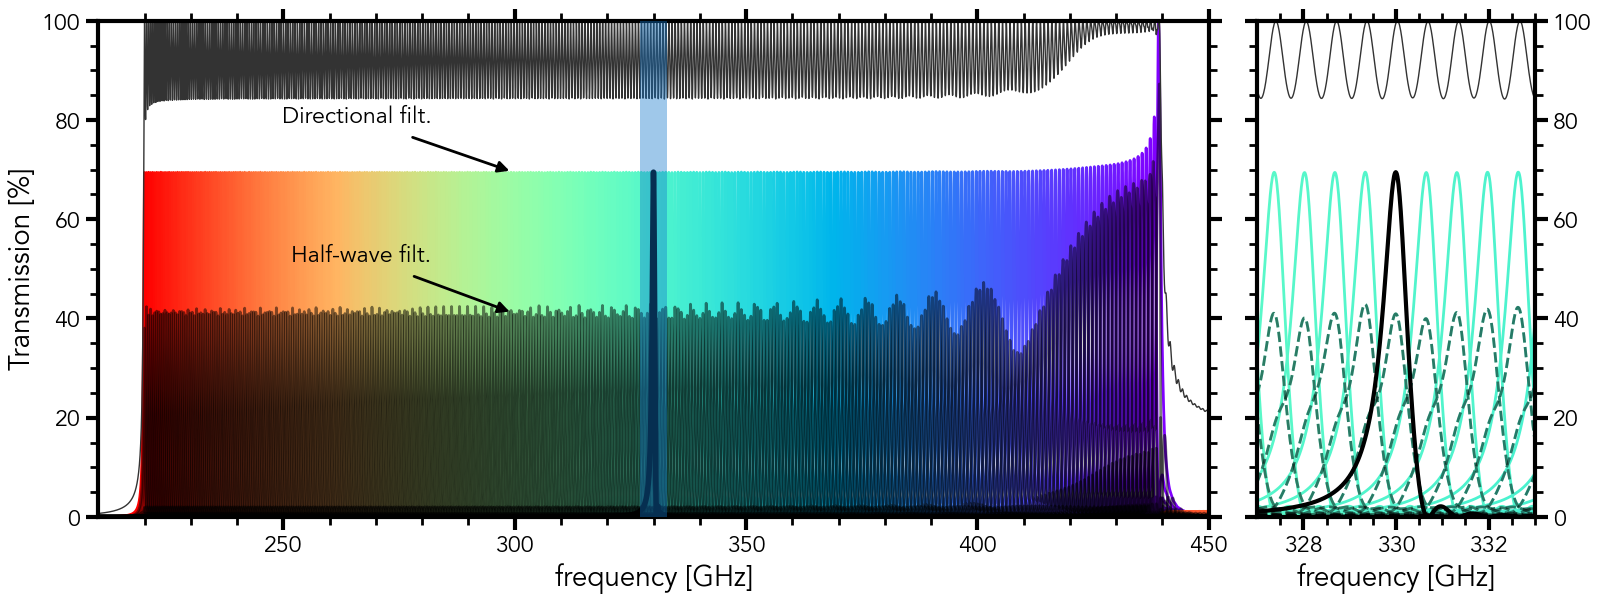

In [ ]:
# plt.close('all')
# fig = plt.figure(figsize=(8,3),layout='constrained')

plt.rcParams['lines.linewidth'] = 1
# gs = fig.add_subplot(1,2,width_ratios=[4,1],top=0.75, _pad=0.14)

gs_kw = dict(top=0.9,hspace=0.1)

fig = plt.figure(figsize=(8,3), layout='constrained')
axs = fig.subplots(1,2,width_ratios=[4,1],sharey='row',gridspec_kw=gs_kw)
# fig.subplots_adjust(wspace=0.3)

##### Filterbank plot, comparison
ax = axs[0]

lines_DF = plotstep_add_filterbank(f,FB_DF_no_variance,ax)
lines = lines_DF

lines_MF = plotstep_add_filterbank(f,FB_MF_no_variance,ax)
lines += lines_MF

for line in lines_MF:
    line.set_color("black")
    line.set_alpha(0.5)
    line.set_linewidth(1)
   

# Sum of filters
sum_filters = np.sum(FB_DF_no_variance.S31_absSq_list,axis=0)
lines += ax.plot(f/1e9,sum_filters,color="0.2",linestyle="-",linewidth=0.5)


## highlight several individual filters
highlight_index = [143]
lines_highlight = []
for index in highlight_index:
    lines_highlight += ax.plot(f/1e9,FB_DF_no_variance.S31_absSq_list[index],color="0.0",linewidth=2)
lines += lines_highlight

# Make in percentage
plotstep_percentage(lines)


## Highlight zoom section
f_zoom = np.array([327e9,333e9])

left, bottom, width, height = (f_zoom[0]/1e9, 0, (f_zoom[1]-f_zoom[0])/1e9,100)
rect = plt.Rectangle((left, bottom), width, height, facecolor="#17C", alpha=0.4,zorder=1000)

ax.add_patch(rect)


## ----------- ANNOTATIONS
ax.annotate("Directional filt.",xycoords='data',xy=(300,69.4),textcoords='axes fraction',xytext=(0.3,0.78), va='bottom', ha='right',
            arrowprops=dict(arrowstyle="-|>", facecolor='black', connectionstyle="arc3"),fontsize='x-small')
ax.annotate("Half-wave filt.",xycoords='data',xy=(300,41),textcoords='axes fraction',xytext=(0.3,0.50), va='bottom', ha='right',
            arrowprops=dict(arrowstyle="-|>", facecolor='black', connectionstyle="arc3"),fontsize='x-small')


ax.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Transmission [%]')  # Add a y-label to the axes.
# ax.set_ylim(0,100)
ax.set_xlim(min(f)/1e9,max(f)/1e9)
# ax.set_title("Filter response")  # Add a title to the axes.
# ax.legend(lines_DF,labels,loc="right",frameon=False);  # Add a legend.
## ----------------------------------



##### zoom in on section of filterbank
ax_zoom = axs[1]
ax_zoom.tick_params(labelleft=False,labelright=True)

lines_DF = plotstep_add_filterbank(f,FB_DF_no_variance,ax_zoom)
lines = lines_DF

lines_MF = plotstep_add_filterbank(f,FB_MF_no_variance,ax_zoom)
lines += lines_MF

lines_MF_grey = plotstep_add_filterbank(f,FB_MF_no_variance,ax_zoom)
lines += lines_MF_grey

for line in lines_MF:
    line.set_linestyle("--")

for line in lines_MF_grey:
    line.set_color("black")
    line.set_alpha(0.5)
    line.set_linestyle("--")


# highlight a filter in zoom in
lines += ax_zoom.plot(f/1e9,FB_DF_no_variance.S31_absSq_list[143],color="0.0",linewidth=1.5,label="highlighted filter")

# Sum of filters
sum_filters = np.sum(FB_DF_no_variance.S31_absSq_list,axis=0)
lines += ax_zoom.plot(f/1e9,sum_filters,label=r"$\sum_i{|S_{i1}|^2},\: i \in [3, \dots, N_\mathrm{filt.}+2]$",color="0.2",linestyle="-",linewidth=0.5)

plotstep_percentage(lines)

ax_zoom.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax_zoom.set_xlim(f_zoom[0]/1e9,f_zoom[1]/1e9)
# ax_zoom.set_title("Filter response")  # Add a title to the axes.





n_colors = 60
cmap = cm.get_cmap('rainbow').copy()
rainbow_legend_colors = [cmap(x) for x in np.linspace(1,0,n_colors)]

# ------ get the legend-entries that are already attached to the figure
h, l = ax.get_legend_handles_labels()
h_zoom, l_zoom = ax_zoom.get_legend_handles_labels()

h += h_zoom
l += l_zoom

# ------ append the multicolor legend patches
h.append(MulticolorPatch(rainbow_legend_colors))
l.append(r"$|S_{i1}|^2$")

fig.legend(h, l, loc='upper left', bbox_to_anchor=(0.1, 1.12, 0.8, 0), handler_map={MulticolorPatch: MulticolorPatchHandler()},mode="expand", borderaxespad=0, ncol=3,fontsize='x-small',handlelength=5.0)

# save and plot figure
savestr = fig_path + "filterbank_comparison.pdf"
fig.savefig(fname=savestr,bbox_inches='tight')

## Scatterplot of f0 and Ql

In [ ]:
def lognormal(mean=0.0, sigma=1.0, size=None):
    E_x = mean
    VAR_x = sigma**2

    mu_log = np.log(E_x/( np.sqrt( VAR_x / (E_x**2) + 1 ) ))
    sigma_log = np.sqrt( np.log( VAR_x / (E_x**2) + 1 ) )

    return rng.lognormal(mu_log,sigma_log,size)

def normal(loc=0.0, scale=1.0, size=None):
    return rng.normal(loc,scale,size)


In [ ]:
# For reproducibility
rng = np.random.default_rng(1483850285938434759343846304598763385782983546)

Qi_res_alt =1200

# lossy transmission line
TransmissionLinesAltDict = {
    'through' : TL_thru,
    'resonator' : TransmissionLine(Z0_res,eps_eff_res,Qi_res_alt),
    'MKID' : TL_thru
}

# construct base filterbank
FB_DF_variance = Filterbank(
    FilterClass=DirectionalFilter,
    TransmissionLines=TransmissionLinesAltDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=0,
    sigma_Qc=0,
    compensate=False
)

# scattering to be applied
std_l_res = 0
std_C_coup = 0
std_eps_eff = 0
std_Z0 = 0.012
std_Qi = 0.234

# apply scattering
for Filter in FB_DF_variance.Filters:
    Filter : DirectionalFilter

    l_res = Filter.Resonator1.l_res
    eps_eff = Filter.Resonator1.TransmissionLine.eps_eff
    Z0 = Filter.Resonator1.TransmissionLine.Z0
    Qi_res = Filter.Resonator1.TransmissionLine.Qi
    C_coup_1 = Filter.Resonator1.Coupler1.C
    C_coup_2 = Filter.Resonator1.Coupler2.C

    # Filter.Resonator1.l_res = normal(l_res,std_l_res*l_res)
    # Filter.Resonator1.TransmissionLine.eps_eff = normal(eps_eff,std_eps_eff*eps_eff)
    Filter.Resonator1.TransmissionLine.Z0 = normal(Z0,std_Z0*Z0)
    Filter.Resonator1.TransmissionLine.Qi = lognormal(Qi_res,std_Qi*Qi_res)
    # Filter.Resonator1.Coupler1.C = normal(C_coup_1,std_C_coup*C_coup_1)
    # Filter.Resonator1.Coupler2.C = normal(C_coup_2,std_C_coup*C_coup_2)
    
    # Filter.Resonator2.l_res = normal(l_res,std_l_res*l_res)
    # Filter.Resonator2.TransmissionLine.eps_eff = normal(eps_eff,std_eps_eff*eps_eff)
    Filter.Resonator2.TransmissionLine.Z0 = normal(Z0,std_Z0*Z0)
    Filter.Resonator2.TransmissionLine.Qi = lognormal(Qi_res,std_Qi*Qi_res)
    # Filter.Resonator2.Coupler1.C = normal(C_coup_1,std_C_coup*C_coup_1)
    # Filter.Resonator2.Coupler2.C = normal(C_coup_2,std_C_coup*C_coup_2)


# calculate response
FB_DF_variance.S(f)
FB_DF_variance.realized_parameters()
print("done")

done


In [ ]:
# For reproducibility
rng = np.random.default_rng(148385028593843475934384623598763385782983546)

Qi_res_alt =1200

# lossy transmission line
TransmissionLinesAltDict = {
    'through' : TL_thru,
    'resonator' : TransmissionLine(Z0_res,eps_eff_res,Qi_res_alt),
    'MKID' : TL_thru
}

# construct base filterbank
FB_MF_variance = Filterbank(
    FilterClass=ManifoldFilter,
    TransmissionLines=TransmissionLinesAltDict,
    f0_min=f0_min,
    f0_max=f0_max,
    Ql=500,
    oversampling=1,
    sigma_f0=0,
    sigma_Qc=0,
    compensate=False
)

# scattering to be applied
std_l_res = 0
std_C_coup = 0
std_eps_eff = 0
std_Z0 = 0.012
std_Qi = 0.234

# apply scattering
for Filter in FB_MF_variance.Filters:
    Filter : ManifoldFilter

    l_res = Filter.Resonator.l_res
    eps_eff = Filter.Resonator.TransmissionLine.eps_eff
    Z0 = Filter.Resonator.TransmissionLine.Z0
    Qi_res = Filter.Resonator.TransmissionLine.Qi
    C_coup_1 = Filter.Resonator.Coupler1.C
    C_coup_2 = Filter.Resonator.Coupler2.C

    # Filter.Resonator.l_res = normal(l_res,std_l_res*l_res)
    # Filter.Resonator.TransmissionLine.eps_eff = normal(eps_eff,std_eps_eff*eps_eff)
    Filter.Resonator.TransmissionLine.Z0 = normal(Z0,std_Z0*Z0)
    Filter.Resonator.TransmissionLine.Qi = lognormal(Qi_res,std_Qi*Qi_res)
    # Filter.Resonator.Coupler1.C = normal(C_coup_1,std_C_coup*C_coup_1)
    # Filter.Resonator.Coupler2.C = normal(C_coup_2,std_C_coup*C_coup_2)


# calculate response
FB_MF_variance.S(f)
FB_MF_variance.realized_parameters()
print("done")

done


In [ ]:
def normal_pdf(data):
    avg = np.mean(data)
    var = np.var(data)
    # From that, we know the shape of the fitted Gaussian.
    x = np.linspace(np.min(data),np.max(data),len(data))
    pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(x-avg)**2/var)
    return x, pdf_y

mean: 0.000
std: 0.122


/var/folders/87/9646k94d3vg5ndcqkj336p_r0000gp/T/ipykernel_94405/793667911.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(fname=savestr,bbox_inches="tight")
meta NOT subset; don't know how to subset; dropped
/Users/louism/Repos/filterbank-performance/.venv/lib/python3.11/site-packages/ipympl/backend_nbagg.py:336: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.figure.savefig(buf, format='png', dpi='figure')


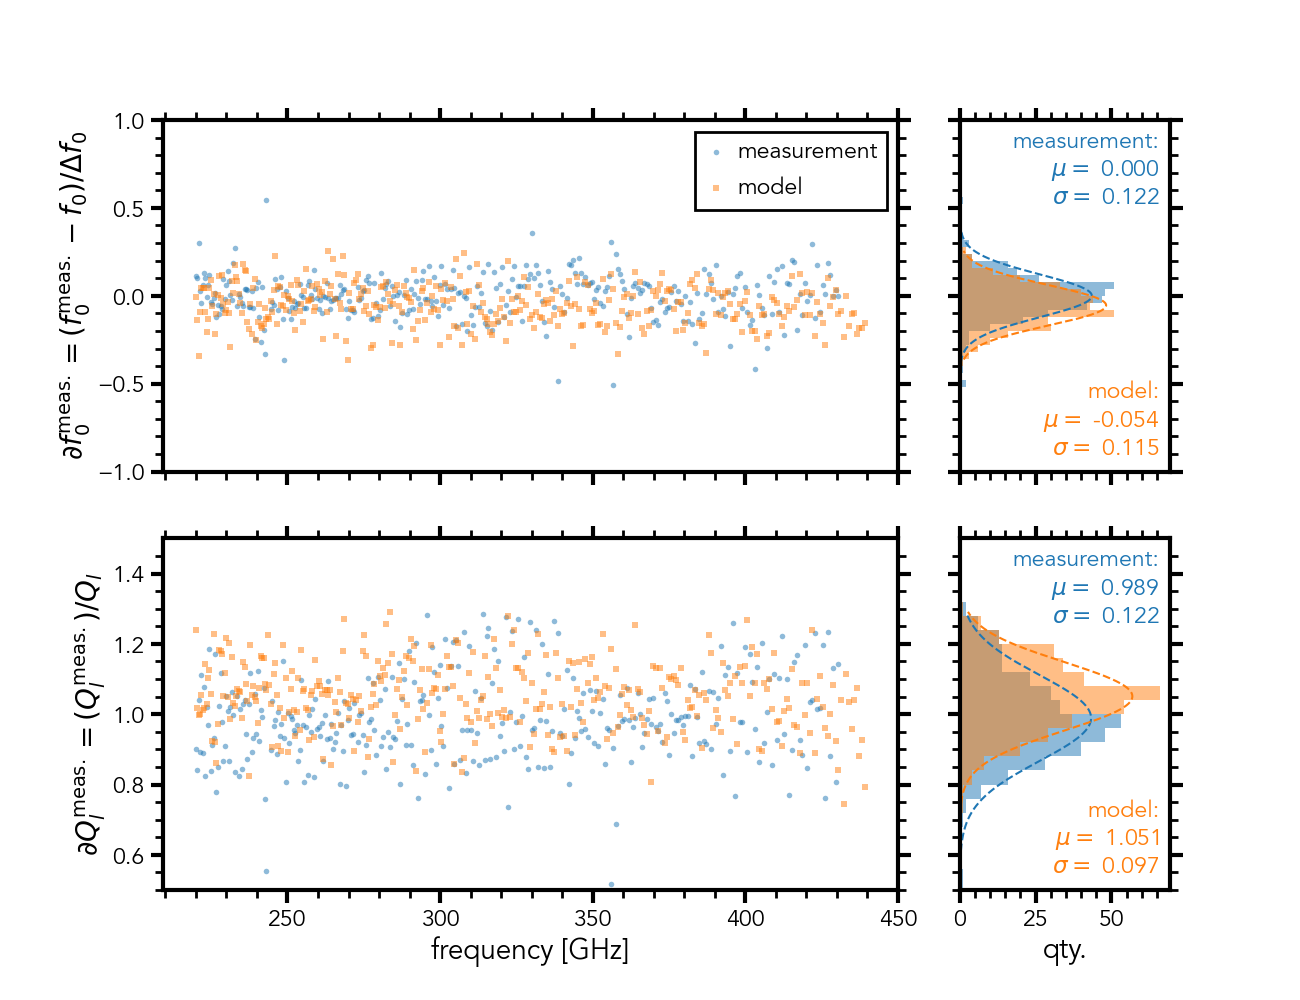

In [ ]:
fig = plt.figure(figsize=(6.5,5))
gs = fig.add_gridspec(2,2,width_ratios=[3.5,1],wspace=0.13,hspace=0.19)

# Directional filter model
f0 = FB_DF_variance.f0
Ql = FB_DF_variance.Ql
f0_DF, Ql_DF, _, _, = FB_DF_variance.realized_parameters()
df_norm = f0/Ql

df0_DF = (f0_DF-f0)/df_norm
dQl_DF = (Ql_DF)/Ql

# LT263 data
data = np.genfromtxt("f_and_Q_scatter_LT263.csv",delimiter=",",comments="#")

# raw data
f0_LT263_design = data[:,0] * 1e9
f0_LT263 = data[:,1] * 1e9
Ql_LT263 = data[:,2]

# ---- dQl
dQl_LT263 = (Ql_LT263) / Ql

# Compensate Ql downshift
# Qi_res or Qi_res_alt, take care what was used above
Qc = (2 * Ql * Qi_res) / (Qi_res - Ql)
Qc_LT263 = (2 * Ql_LT263 * Qi_res) / (Qi_res - Ql_LT263)

# print(np.mean(Qc_LT263))
# print(np.mean((Qc_LT263 * Qi_res) / (Qc_LT263 + 2 * Qi_res)))
# print(np.mean(Ql_LT263))

Qc_LT263_normalized = Qc_LT263 / (np.mean(Qc_LT263) / Qc)
Ql_LT263_normalized = (Qc_LT263_normalized * Qi_res) / (Qc_LT263_normalized + 2 * Qi_res)

# normalized
dQl_LT263_normalized = (Ql_LT263_normalized) / Ql

# ---- df0
# design filter width
df_design = f0_LT263_design/Ql

# fit the f0 results, get offset. (to remove offset later)
coefs = poly.polyfit(f0_LT263_design,f0_LT263,3)
f0_offset = poly.polyval(f0_LT263_design,coefs) - f0_LT263_design

# normalized (=removed offset) f0 and df0
f0_LT263_normalized = f0_LT263 - f0_offset
df0_LT263_normalized = (f0_LT263_normalized-f0_LT263_design) / df_design

# print statistics
print(f'mean: {np.mean(df0_LT263_normalized):.3f}')
print(f'std: {np.std(df0_LT263_normalized):.3f}')




##-----plot f0
ax_f0 = fig.add_subplot(gs[0,0])
ax_f0.scatter(f0_LT263_design/1e9,df0_LT263_normalized,alpha=0.5,linewidths=0,label="measurement")
ax_f0.scatter(f0/1e9,df0_DF,alpha=0.5,linewidths=0,marker='s',label="model")

ax_f0.set_ylim(-1,1)
# ax_f0.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax_f0.set_ylabel(r'$\partial f_0^\mathrm{meas.} = (f_0^\mathrm{meas.} - f_0) / \Delta f_0$')  # Add a y-label to the axes.
ax_f0.legend(loc="upper right",fontsize='x-small')
ax_f0.tick_params(labelbottom=False)

# Histogram
ax_hist_f0 = fig.add_subplot(gs[0,1],sharey=ax_f0)

bins = make_bins_from_max(df0_LT263_normalized,df0_DF,binwidth=0.04)
ax_hist_f0.hist(df0_LT263_normalized,orientation='horizontal',bins=bins,alpha=0.5)
ax_hist_f0.hist(df0_DF,orientation='horizontal',bins=bins,alpha=0.5)
ax_hist_f0.tick_params(labelleft=False,labelbottom=False)

# Fits
x, pdf_y = normal_pdf(df0_LT263_normalized)
ax_hist_f0.plot(pdf_y*len(x)*(bins[1]-bins[0]),x,color="C0",linewidth=0.75,linestyle="--")
x, pdf_y = normal_pdf(df0_DF)
ax_hist_f0.plot(pdf_y*len(x)*(bins[1]-bins[0]),x,color="C1",linewidth=0.75,linestyle="--")


# Show std and mean
mean_text = rf"$\mu =$ {np.mean(df0_LT263_normalized):.3f}"
std_text = rf"$\sigma =$ {np.std(df0_LT263_normalized):.3f}"
text = "measurement:\n" + mean_text + "\n" + std_text
ax_hist_f0.text(0.95, 0.97, text,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax_hist_f0.transAxes,fontsize='x-small',color='C0')

mean_text = rf"$\mu =$ {np.mean(df0_DF):.3f}"
std_text = rf"$\sigma =$ {np.std(df0_DF):.3f}"
text = "model:\n" + mean_text + "\n" + std_text
ax_hist_f0.text(0.95, 0.03, text,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax_hist_f0.transAxes,fontsize='x-small',color='C1')



##-----plot Ql
ax_Ql = fig.add_subplot(gs[1,0],sharex=ax_f0)
ax_Ql.scatter(f0_LT263_design/1e9,dQl_LT263_normalized,alpha=0.5,linewidths=0,label="measurement")
ax_Ql.scatter(f0/1e9,dQl_DF,alpha=0.5,linewidths=0,marker='s',label="model")

ax_Ql.set_ylim(0.5,1.5)
ax_Ql.set_xlabel('frequency [GHz]')  # Add an x-label to the axes.
ax_Ql.set_ylabel(r'$\partial Q_l^\mathrm{meas.} = (Q_l^\mathrm{meas.})/Q_l$')  # Add a y-label to the axes.
# ax_Ql.legend(loc="upper right",fontsize='xx-small')


# Histogram
ax_hist_Ql = fig.add_subplot(gs[1,1],sharey=ax_Ql,sharex=ax_hist_f0)

bins = make_bins_from_max(dQl_LT263_normalized,dQl_DF,binwidth=0.04)
ax_hist_Ql.hist(dQl_LT263_normalized,orientation='horizontal',bins=bins,alpha=0.5)
ax_hist_Ql.hist(dQl_DF,orientation='horizontal',bins=bins,alpha=0.5)
ax_hist_Ql.set_xlabel("qty.")
ax_hist_Ql.tick_params(labelleft=False)

# Fits
x, pdf_y = normal_pdf(dQl_LT263_normalized)
ax_hist_Ql.plot(pdf_y*len(x)*(bins[1]-bins[0]),x,color="C0",linewidth=0.75,linestyle="--")
x, pdf_y = normal_pdf(dQl_DF)
ax_hist_Ql.plot(pdf_y*len(x)*(bins[1]-bins[0]),x,color="C1",linewidth=0.75,linestyle="--")


# Show std and mean
mean_text = rf"$\mu =$ {np.mean(dQl_LT263_normalized):.3f}"
std_text = rf"$\sigma =$ {np.std(dQl_LT263_normalized):.3f}"
text = "measurement:\n" + mean_text + "\n" + std_text
ax_hist_Ql.text(0.95, 0.97, text,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax_hist_Ql.transAxes,fontsize='x-small',color='C0')

mean_text = rf"$\mu =$ {np.mean(dQl_DF):.3f}"
std_text = rf"$\sigma =$ {np.std(dQl_DF):.3f}"
text = "model:\n" + mean_text + "\n" + std_text
ax_hist_Ql.text(0.95, 0.03, text,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax_hist_Ql.transAxes,fontsize='x-small',color='C1')

# save and plot figure
savestr = fig_path + "scatter_data.pdf"
fig.savefig(fname=savestr,bbox_inches="tight")


## Variance applied to filterbank grid

In [ ]:
# scattering to be applied
std_l_res = 0
std_C_coup = 0
std_eps_eff = 0
std_Z0 = 0.012
std_Qi = 0.234

In [ ]:
def filterbank_FOM(FilterClass: BaseFilter,f,oversampling,spectral_resolution):
    FB = Filterbank(
        FilterClass=FilterClass,
        TransmissionLines=TransmissionLinesLossyDict,
        f0_min=f0_min,
        f0_max=f0_max,
        Ql=spectral_resolution,
        oversampling=oversampling,
        sigma_f0=0,
        sigma_Qc=0,
        compensate=False
    )

    if type(FilterClass) == ManifoldFilter:
        MF_apply_variance(FB)
    elif type(FilterClass) == DirectionalFilter:
        DF_apply_variance(FB)

    FB.S(f)
    f0, Ql, _, _, = FB.realized_parameters()

    eta = [np.interp(f0_i,f,S31_absSq) for f0_i,S31_absSq in zip(f0,FB.S31_absSq_list)]

    sum_filters = np.sum(FB.S31_absSq_list,axis=0)
    sum_filters_at_f0 = np.interp(f0,f,sum_filters)
    return f0, Ql, eta, sum_filters_at_f0


def DF_apply_variance(Filterbank : Filterbank):
    for Filter in Filterbank.Filters:
        Filter : DirectionalFilter

        l_res = Filter.Resonator1.l_res
        eps_eff = Filter.Resonator1.TransmissionLine.eps_eff
        Z0 = Filter.Resonator1.TransmissionLine.Z0
        Qi_res = Filter.Resonator1.TransmissionLine.Qi
        C_coup_1 = Filter.Resonator1.Coupler1.C
        C_coup_2 = Filter.Resonator1.Coupler2.C

        # Filter.Resonator1.l_res = normal(l_res,std_l_res*l_res)
        # Filter.Resonator1.TransmissionLine.eps_eff = normal(eps_eff,std_eps_eff*eps_eff)
        Filter.Resonator1.TransmissionLine.Z0 = normal(Z0,std_Z0*Z0)
        Filter.Resonator1.TransmissionLine.Qi = lognormal(Qi_res,std_Qi*Qi_res)
        # Filter.Resonator1.Coupler1.C = normal(C_coup_1,std_C_coup*C_coup_1)
        # Filter.Resonator1.Coupler2.C = normal(C_coup_2,std_C_coup*C_coup_2)
        
        # Filter.Resonator2.l_res = normal(l_res,std_l_res*l_res)
        # Filter.Resonator2.TransmissionLine.eps_eff = normal(eps_eff,std_eps_eff*eps_eff)
        Filter.Resonator2.TransmissionLine.Z0 = normal(Z0,std_Z0*Z0)
        Filter.Resonator2.TransmissionLine.Qi = lognormal(Qi_res,std_Qi*Qi_res)
        # Filter.Resonator2.Coupler1.C = normal(C_coup_1,std_C_coup*C_coup_1)
        # Filter.Resonator2.Coupler2.C = normal(C_coup_2,std_C_coup*C_coup_2)
    


def MF_apply_variance(Filterbank : Filterbank):
    for Filter in Filterbank.Filters:
        Filter : ManifoldFilter

        l_res = Filter.Resonator.l_res
        eps_eff = Filter.Resonator.TransmissionLine.eps_eff
        Z0 = Filter.Resonator.TransmissionLine.Z0
        Qi_res = Filter.Resonator.TransmissionLine.Qi
        C_coup_1 = Filter.Resonator.Coupler1.C
        C_coup_2 = Filter.Resonator.Coupler2.C

        # Filter.Resonator.l_res = normal(l_res,std_l_res*l_res)
        # Filter.Resonator.TransmissionLine.eps_eff = normal(eps_eff,std_eps_eff*eps_eff)
        Filter.Resonator.TransmissionLine.Z0 = normal(Z0,std_Z0*Z0)
        Filter.Resonator.TransmissionLine.Qi = lognormal(Qi_res,std_Qi*Qi_res)
        # Filter.Resonator.Coupler1.C = normal(C_coup_1,std_C_coup*C_coup_1)
        # Filter.Resonator.Coupler2.C = normal(C_coup_2,std_C_coup*C_coup_2)

In [ ]:
nF = int(8e3)
f_sweep = np.linspace(210e9,450e9,nF)

# oversampling values and spectral resolutions to sweep over
oversampling = [0.5,
                0.75, 
                0.875, 
                1.0, 
                1.25, 
                1.5, 
                2.0]

spectral_resolution = [25,
                       100,
                       300,
                       500,
                       600]

# Figure of Merit labels
FOM_labels = ("f0","Ql","eta","sum")

out_data_DF = np.empty((len(oversampling),len(spectral_resolution)),dtype=dict)
out_data_MF = np.empty((len(oversampling),len(spectral_resolution)),dtype=dict)




for i,os in enumerate(oversampling):
    for j,R in enumerate(spectral_resolution):
        f0, Ql, eta, sum = filterbank_FOM(DirectionalFilter,f_sweep,oversampling=os,spectral_resolution=R)
        out_data_DF[i,j] = dict(zip(FOM_labels,[f0, Ql, eta, sum]))
        f0, Ql, eta, sum = filterbank_FOM(ManifoldFilter,f_sweep,oversampling=os,spectral_resolution=R)
        out_data_MF[i,j] = dict(zip(FOM_labels,[f0, Ql, eta, sum]))

Text(0.02, 0.5, 'Spectral resolution')

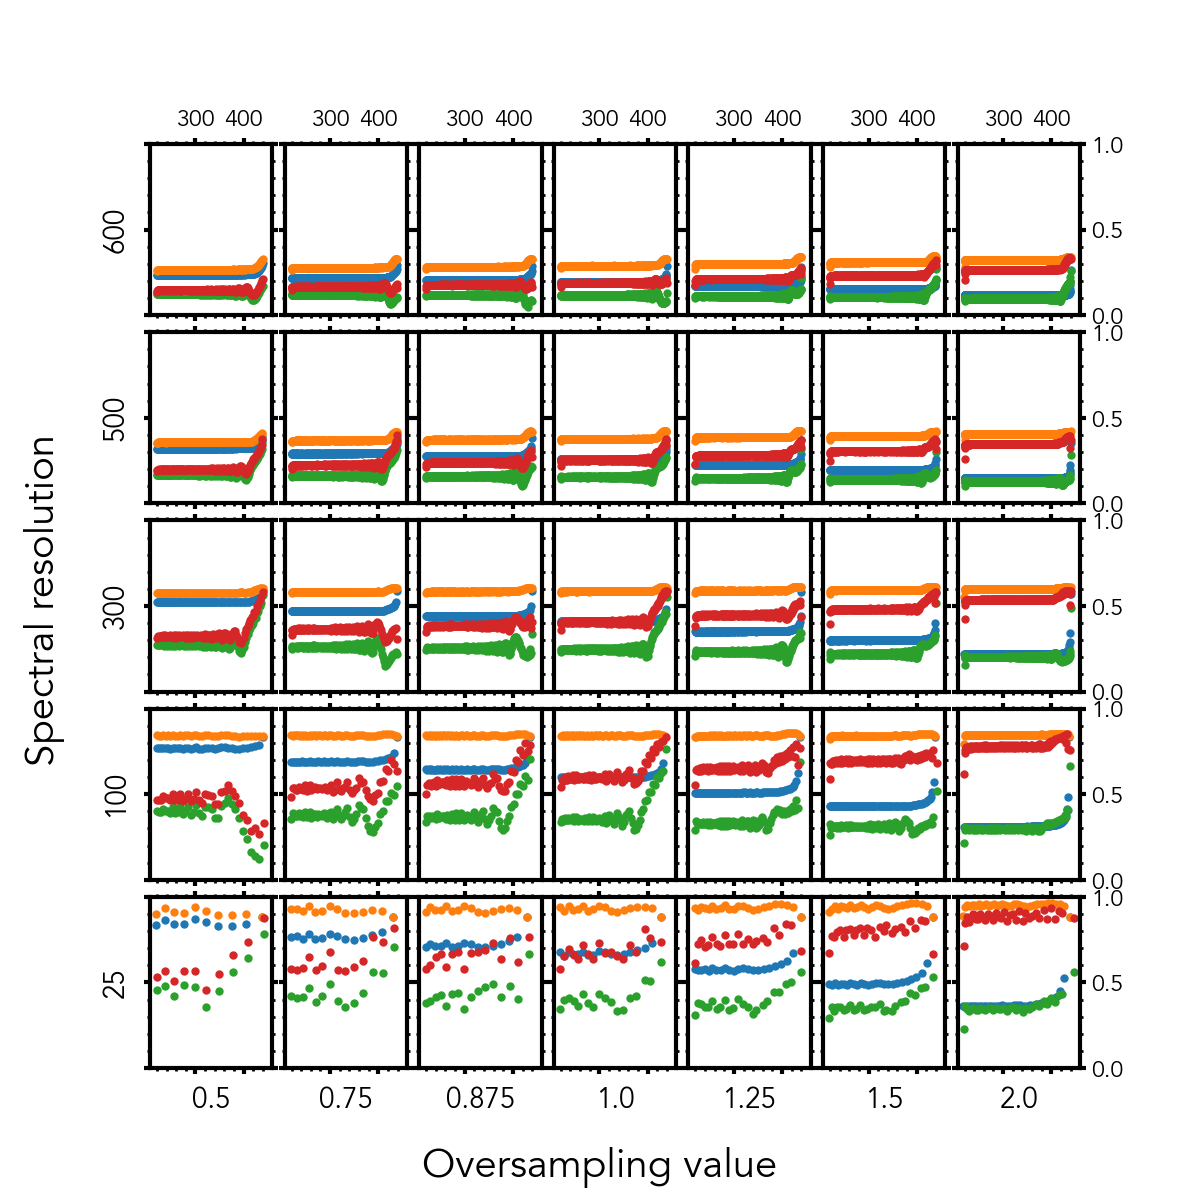

In [ ]:
fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(len(spectral_resolution),len(oversampling),hspace=0.1,wspace=0.1)

for i,os in enumerate(oversampling):
    for j,R in reversed(list(enumerate(spectral_resolution))):
        k = len(spectral_resolution) - 1 - j # reversed order index for plotting purposes
        if i == 0 and k == 0:
            ax = fig.add_subplot(gs[k,i])
            ax_anchor = ax
        else:
            ax = fig.add_subplot(gs[k,i],sharex=ax_anchor,sharey=ax_anchor)
        ax.tick_params(labelleft=False,labelright=True,labelbottom=False,labeltop=True)
        ax.tick_params(axis='both',which='major',length=2)
        ax.tick_params(axis='both',which='minor',length=1)
        if i == 0:
            ax.set_ylabel(f"{R}")
        if j == 0:
            ax.set_xlabel(f"{os}")
        ax.label_outer()
        
        f0_DF = out_data_DF[i,j]['f0']
        eta_DF = out_data_DF[i,j]['eta']
        sum_DF = out_data_DF[i,j]['sum']
        ax.scatter(f0_DF/1e9,eta_DF)
        ax.scatter(f0_DF/1e9,sum_DF)
        
        f0_MF = out_data_MF[i,j]['f0']
        eta_MF = out_data_MF[i,j]['eta']
        sum_MF = out_data_MF[i,j]['sum']
        ax.scatter(f0_MF/1e9,eta_MF)
        ax.scatter(f0_MF/1e9,sum_MF)

ax_anchor.set_ylim(0,1)

fig.supxlabel("Oversampling value")
fig.supylabel("Spectral resolution")

/var/folders/87/9646k94d3vg5ndcqkj336p_r0000gp/T/ipykernel_94405/3463115048.py:26: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.3)
meta NOT subset; don't know how to subset; dropped


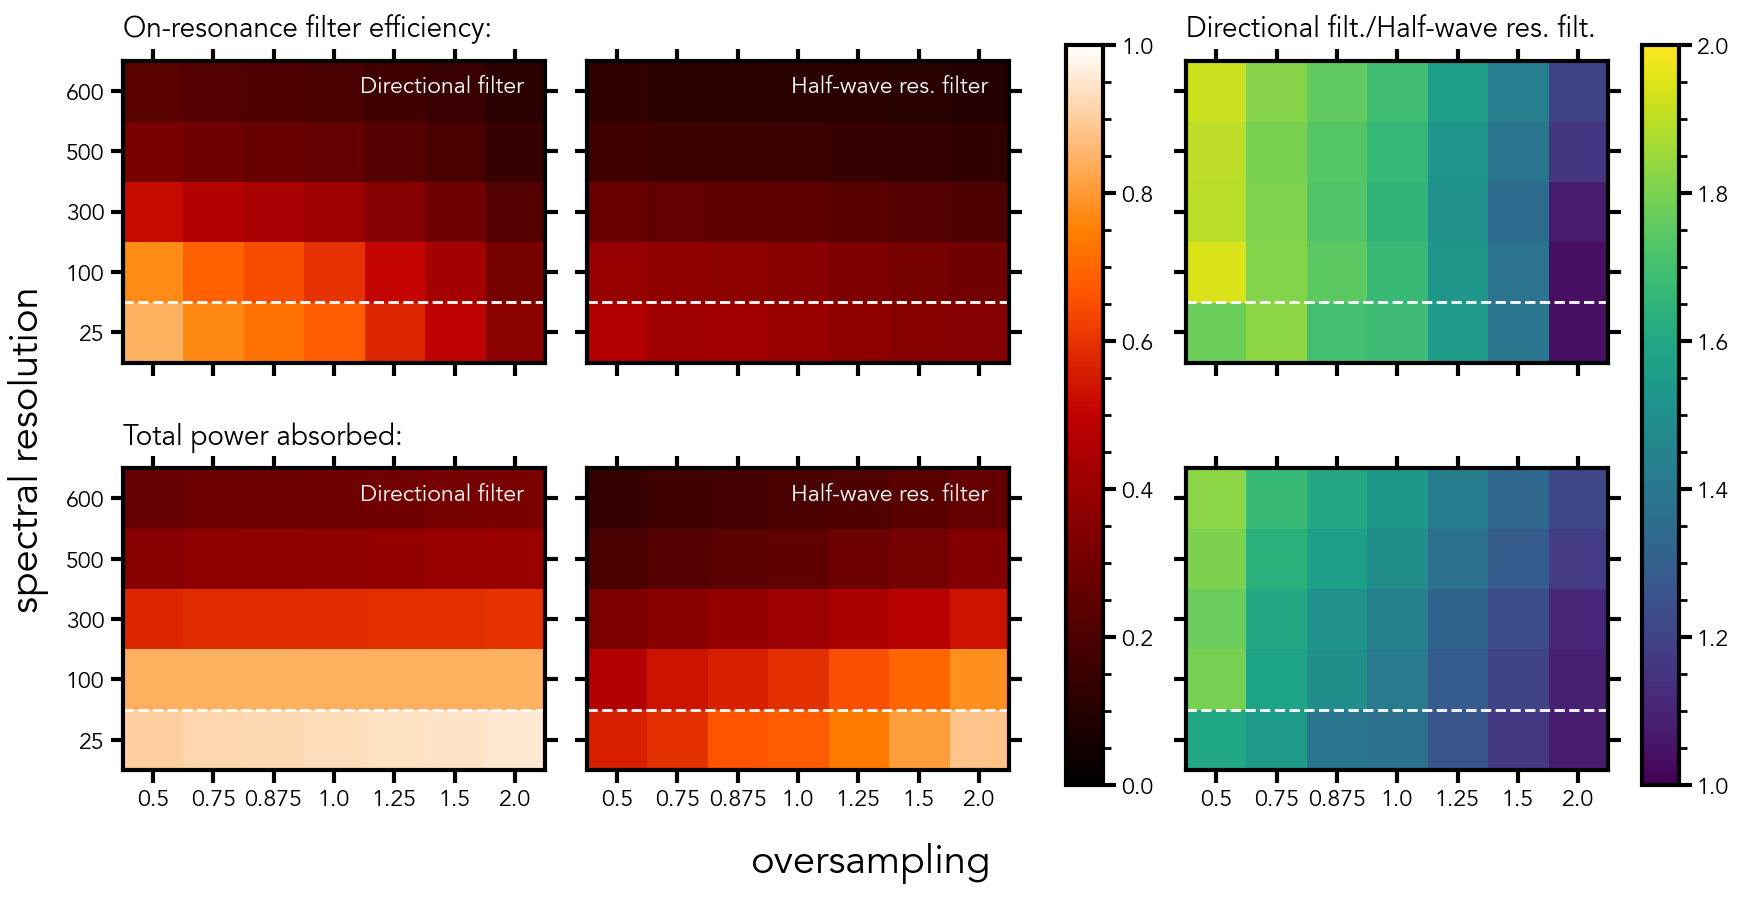

In [ ]:
X_eta_MF = np.zeros((len(oversampling),len(spectral_resolution)))
X_eta_DF = np.zeros((len(oversampling),len(spectral_resolution)))
X_sum_MF = np.zeros((len(oversampling),len(spectral_resolution)))
X_sum_DF = np.zeros((len(oversampling),len(spectral_resolution)))

for i,os in enumerate(oversampling):
    for j,R in enumerate(spectral_resolution):

        f0_DF = out_data_DF[i,j]['f0']
        eta_DF = out_data_DF[i,j]['eta']
        X_eta_DF[i,j] = np.median(eta_DF)
        sum_DF = out_data_DF[i,j]['sum']
        X_sum_DF[i,j] = np.median(sum_DF)
        
        f0_MF = out_data_MF[i,j]['f0']
        eta_MF = out_data_MF[i,j]['eta']
        X_eta_MF[i,j] = np.median(eta_MF)
        sum_MF = out_data_MF[i,j]['sum']
        X_sum_MF[i,j] = np.median(sum_MF)


gs_kw = dict(top=0.9,hspace=0.1)

fig = plt.figure(figsize=(8.7,4.5), layout='constrained')
axs = fig.subplots(2,3,sharex='col',sharey='row',gridspec_kw=gs_kw)
fig.subplots_adjust(wspace=0.3)

cmap_all = 'gist_heat'

im1 = axs[0,0].imshow(X_eta_DF.T, vmin=0, vmax=1,cmap=cmap_all)
axs[1,0].imshow(X_sum_DF.T, vmin=0, vmax=1,cmap=cmap_all)
axs[0,1].imshow(X_eta_MF.T, vmin=0, vmax=1,cmap=cmap_all)
axs[1,1].imshow(X_sum_MF.T, vmin=0, vmax=1,cmap=cmap_all)

im2 = axs[0,2].imshow(X_eta_DF.T/X_eta_MF.T, vmin=1, vmax=2,cmap='viridis')
axs[1,2].imshow(X_sum_DF.T/X_sum_MF.T, vmin=1, vmax=2,cmap='viridis')


for i,ax in enumerate(axs[:,:2].flatten()):
    if i % 2 == 0:
        ax.text(0.95, 0.95, 'Directional filter',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,fontsize='x-small',color='w')
    else:
        ax.text(0.95, 0.95, 'Half-wave res. filter',
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,fontsize='x-small',color='w')
    ax.tick_params(which='minor',length=0)
    ax.set_xticks(np.arange(len(oversampling)), labels=oversampling)
    ax.set_yticks(np.arange(len(spectral_resolution)), labels=spectral_resolution)
    ax.axhline(y=0.5, color='w', linestyle='--')
    # ax.invert_yaxis()

for i,ax in enumerate(axs[:,-1:].flatten()):    
    ax.tick_params(which='minor',length=0)
    ax.set_xticks(np.arange(len(oversampling)), labels=oversampling)
    ax.set_yticks(np.arange(len(spectral_resolution)), labels=spectral_resolution)
    ax.axhline(y=0.5, color='w', linestyle='--')

axs[0,0].invert_yaxis()
axs[1,0].invert_yaxis()

axs[0,0].text(0, 1.05, 'On-resonance filter efficiency:',
                horizontalalignment='left',
                verticalalignment='bottom',
                transform=axs[0,0].transAxes,fontsize='small',color='k')
axs[1,0].text(0, 1.05, 'Total power absorbed:',
                horizontalalignment='left',
                verticalalignment='bottom',
                transform=axs[1,0].transAxes,fontsize='small',color='k')
axs[0,2].text(0, 1.05, 'Directional filt./Half-wave res. filt.',
                horizontalalignment='left',
                verticalalignment='bottom',
                transform=axs[0,2].transAxes,fontsize='small',color='k')

fig.colorbar(im1, ax=axs[:,:2], location='right')
fig.colorbar(im2, ax=axs[:,-1:], location='right')

fig.supxlabel('oversampling')
fig.supylabel('spectral resolution')
fig.get_layout_engine().set(h_pad=0.08)

# save and plot figure
savestr = fig_path + "grid_simulation.pdf"
fig.savefig(fname=savestr)

In [ ]:
plt.show('all')